In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D

In [5]:
migration_data_LDPE = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/archive/inert-layer-Vergleich/migrated_mass_over_time-4-layer-LDPE-thin.npy")
migration_data_PET = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/archive/inert-layer-Vergleich/migrated_mass_over_time-4-layer-PET-thin.npy")
time_points = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/archive/inert-layer-Vergleich/time_points-4-layer-LDPE.npy")

ValueError: x and y must have same first dimension, but have shapes (63072,) and (864,)

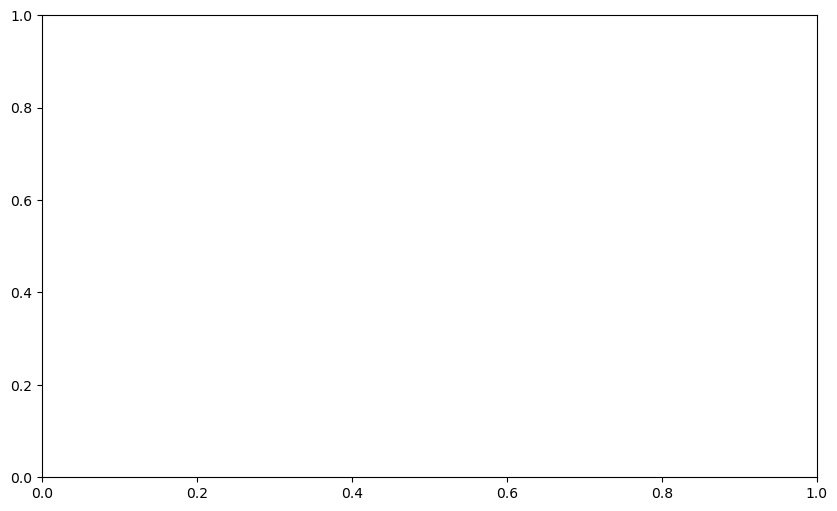

In [6]:
# Konvertiere die Zeitpunkte in Tage
time_points_days = np.array(time_points) / (3600 * 24)  # Zeitpunkte in Tage umrechnen

# Erstelle die Figur
fig, ax1 = plt.subplots(figsize=(10, 6))

colors = {
    'LDPE': "#F06D1D",  # LDPE (orange)
    'fl. Kontaktphase': (100/255, 230/255, 223/255),  # fl. Kontaktphase (light teal)
    'HDPE': (50/255, 200/255, 100/255),  # HDPE (cornflower blue)
    'PP': (200/255, 50/255, 238/255),  # PP (medium slate blue)
    'PET': "#00349D"
}
# Plot für LDPE auf der linken y-Achse
line_ldpe, = ax1.plot(time_points_days, migration_data_LDPE, linewidth=2, color=colors['LDPE'], label='Verbundpolymer 1 (LDPE)')
ax1.set_xlabel('Zeit $[Tage]$', fontsize=14)
ax1.set_ylabel('spez. Migrationsmenge $[mg/dm^2]$', fontsize=14)
ax1.tick_params(axis='both', labelsize=14)

# Stelle die rechte y-Achse (PET) auf wissenschaftliche Notation mit Faktor 10^-2
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax1.yaxis.get_offset_text().set_fontsize(14)
ax1.yaxis.get_offset_text().set_position((1, 0))

# Erstelle eine zweite y-Achse für PET
ax2 = ax1.twinx()
line_pet, = ax2.plot(time_points_days, migration_data_PET, linewidth=2, color=colors['PET'], label='Verbundpolymer 2 (PET)')
ax2.set_ylabel('')  # Leere Beschriftung für die rechte y-Achse, da wir nur eine Beschriftung haben wollen
ax2.tick_params(axis='y', labelsize=14)

# Anpassung der Farben der Achsenbeschriftungen
ax1.set_ylabel('spez. Migrationsmenge $[mg/dm^2]$ ', fontsize=14, color=colors['LDPE'])  # Links: LDPE
ax2.set_ylabel('spez. Migrationsmenge $[mg/dm^2]$ ', fontsize=14, color=colors['PET'])    # Rechts: PET


# Stelle die rechte y-Achse (PET) auf wissenschaftliche Notation mit Faktor 10^-2
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.yaxis.get_offset_text().set_fontsize(14)
ax2.yaxis.get_offset_text().set_position((1.05, 0))

# Vertikale Linie für LDPE, wenn der Emigrationswert 10^-5 überschreitet
threshold_index_ldpe = np.argmax(migration_data_LDPE > 1e-5)
if migration_data_LDPE[threshold_index_ldpe] > 1e-5:
    threshold_time_ldpe = time_points_days[threshold_index_ldpe]
    line_ldpe_threshold = plt.axvline(x=threshold_time_ldpe, color="#F06D1D", linestyle='--', label=f'LDPE: $> 10^{{-5}}$ mg/dm^2 nach {threshold_time_ldpe:.2f} Tagen')

# Vertikale Linie für PET, wenn der Emigrationswert 10^-5 überschreitet
threshold_index_pet = np.argmax(migration_data_PET > 1e-5)
if migration_data_PET[threshold_index_pet] > 1e-5:
    threshold_time_pet = time_points_days[threshold_index_pet]
    line_pet_threshold = plt.axvline(x=threshold_time_pet, color="#00349D", linestyle='--', label=f'PET: $> 10^{{-5}}$ mg/dm^2 nach {threshold_time_pet:.2f} Tagen')

# # Einheitliche Achsenbeschriftungen in Schwarz
# ax1.yaxis.label.set_color(colors['LDPE'])
# ax1.xaxis.label.set_color('black')
# ax2.yaxis.label.set_color(colors['PET'])

# Ticks in der Farbe der Kurven, aber Achsenbeschriftungen in Schwarz
ax1.tick_params(axis='y', colors=colors['LDPE'])  # Ticks der linken y-Achse in LDPE-Farbe
ax2.tick_params(axis='y', colors=colors['PET'])   # Ticks der rechten y-Achse in PET-Farbe

# Achsenbeschriftungen in Schwarz
ax1.yaxis.label.set_color('black')  # Linke y-Achsenbeschriftung in Schwarz
ax2.yaxis.label.set_color('black')  # Rechte y-Achsenbeschriftung in Schwarz

# X-Achse ebenfalls in Schwarz für die Ticks und Beschriftung
ax1.tick_params(axis='x', colors='black')  # Ticks der x-Achse in Schwarz
ax1.xaxis.label.set_color('black')  # x-Achsenbeschriftung in Schwarz


# Erstelle zwei separate Legenden und platziere sie außerhalb des Plots
# Erstellt manuell Line2D-Objekte für die Legenden
legend_ldpe_elements = [Line2D([0], [0], color=colors['LDPE'], lw=2, label='Verbundpolymer 1 '),
                        Line2D([0], [0], color=colors['LDPE'], linestyle='--', label=f'$> 10^{{-5}}$ $mg/dm^2$ nach {threshold_time_ldpe:.0f} Tagen')]

legend_pet_elements = [Line2D([0], [0], color=colors['PET'], lw=2, label='Verbundpolymer 2 '),
                       Line2D([0], [0], color=colors['PET'], linestyle='--', label=f'$> 10^{{-5}}$ $mg/dm^2$ nach {threshold_time_pet:.0f} Tagen')]

# Erste Legende für LDPE
legend_ldpe = ax1.legend(handles=legend_ldpe_elements, loc='lower center', fontsize=14, bbox_to_anchor=(0.23, 1.05))

# Zweite Legende für PET
legend_pet = ax2.legend(handles=legend_pet_elements, loc='lower center', fontsize=14, bbox_to_anchor=(0.75, 1.05))

# Achsenbeschriftung und Formatierung
plt.xlabel('Zeit $[Tage]$', fontsize=14)
# plt.ylabel('spez. Migrationsmenge $[mg/dm^2]$', fontsize=14)


# Speichere den Plot
plt.savefig("/Users/tomhartmann/Documents/00_UNI/01_MASTER/STUDIENARBEIT/000_Vektorgrafiken/ML-Modell/LDPE-PET-migrationcurve-new.pdf", bbox_inches='tight')

# Plot anzeigen
plt.show()

In [24]:
migration_data_LDPE[-1],migration_data_PET[-1]

(0.07855498199077604, 0.00046162789787886435)

In [25]:
# Define the layers using a dictionary
def define_layers():
    return [
        {'D': 1.65e-8, 'd': 0.15, 'nx': 150, 'K_value': 1, 'C_init': 0.0, 'density': 1},   # Layer 2
        {'D': 3.42e-10, 'd': 0.2, 'nx': 200, 'K_value': 1, 'C_init': 1000.0, 'density': 1},   # Layer 1 
        {'D': 1.53e-10, 'd': 0.1, 'nx': 100, 'K_value': 1, 'C_init': 0.0, 'density': 1},   # Layer 3
        {'D': 3.63e-13, 'd': 0.1, 'nx': 100, 'K_value': 1, 'C_init': 0.0, 'density': 1},   # Layer 2
        {'D': 1e-2, 'd': 1, 'nx': 1000, 'K_value': None, 'C_init': 0.0, 'density': 1}   # Last Layer
    ]

# HIER NOCH MATERIAL IN DIC ERGÄNZEN!!!
# ['LDPE', 1.6573965186495746e-08]
# ['HDPE', 3.4243772990881965e-10]
# ['PP', 1.5386719045458272e-10]
# ['LDPE', 1.6573965186495746e-08]

def initialize_grid(layers):
    x = []
    
    for i, layer in enumerate(layers):
        d = layer['d']
        nx = layer['nx']
        
        if i == 0:
            x1 = np.linspace(0, d, nx, endpoint=True)
        else:
            # Ensure that the last point of the previous layer and first point of current layer align
            x1 = np.linspace(np.sum([l['d'] for l in layers[:i]]), 
                             np.sum([l['d'] for l in layers[:i+1]]), 
                             nx, 
                             endpoint=True)  # Use endpoint=True to align the grids at the interface
        x.append(x1)

    # Concatenate the grid points
    x = np.concatenate(x)

    return x


C_values_LDPE = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/inert-layer-Vergleich/C_values-4-layer-LDPE.npy")

# Run the simulation
T = 3600 * 24 * 365 * 2  # Total simulation time [s]
dt = 1000  # Time step size [s]

Nt = int(T/dt)

layers = define_layers()
x = initialize_grid(layers)

total_masses_LDPE = []

for n in range(Nt):
    C = C_values_LDPE[n]
    # Save concentration profiles and mass at specific time steps
    total_mass = np.trapz(C, x)
    total_masses_LDPE.append(total_mass)
        
        





In [26]:
def plot_mass_conservation(total_masses, total_mass_init, T, Nt, plot_interval):
    # Calculate the mass difference from the initial total mass
    rel_deviation = ((np.array(total_masses) - total_mass_init) / total_mass_init) * 100
    data = np.load("/Users/tomhartmann/Desktop/studienarbeit-migrationsmodellierung/data/inert-layer-Vergleich/masserror-PET.npy")
    total_masses_PET = data
    rel_deviation_2 = ((np.array(total_masses_PET) - total_mass_init) / total_mass_init) * 100
    colors = {
    'LDPE': (241/255, 109/255, 29/255),  # LDPE (orange)
    'fl. Kontaktphase': (100/255, 230/255, 223/255),  # fl. Kontaktphase (light teal)
    'HDPE': (50/255, 200/255, 100/255),  # HDPE (cornflower blue)
    'PP': (200/255, 50/255, 238/255),  # PP (medium slate blue)
    'PET': (100/255, 100/255, 100/255)
}
    # Create an array of time values corresponding to the simulation steps
    time_values = np.linspace(0, T, Nt)
    # Plot every 'plot_interval' time step
    plt.figure(figsize=(10, 6))
    plt.plot(time_values[::plot_interval] / (3600 * 24), rel_deviation[::plot_interval], 
             label='Verbundpolymer 1', linewidth = 2, color = colors['LDPE'])
    plt.plot(time_values[::plot_interval] / (3600 * 24), rel_deviation_2[::plot_interval], 
             label='Verbundpolymer 2', linewidth = 2, color =  colors['PET'])
    
    plt.axhline(0, color='r', linestyle='--', label="$\Delta c_{{\%}}$ = 0", linewidth = 1)
    
    plt.text(0.45, 0.9, r'$\Delta c_{{\%}} = \frac{\int c(t) \, dx - \int c_{\mathrm{init}} \, dx}{\int c_{\mathrm{init}} \, dx} \times 100$', 
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=16)

    # Add the LaTeX formula for the relative deviation using integrals
    
    # Set plot labels and title
    plt.xlabel("Zeit $[Tage]$", fontsize = 14)
    plt.ylabel("$\Delta c_{{\%}}$ $[\%]$", fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14)
    plt.savefig("/Users/tomhartmann/Documents/00_UNI/01_MASTER/STUDIENARBEIT/000_Vektorgrafiken/ML-Modell/mass-error-4layers-2years-comparison.pdf", bbox_inches='tight')
    plt.show()
    return 

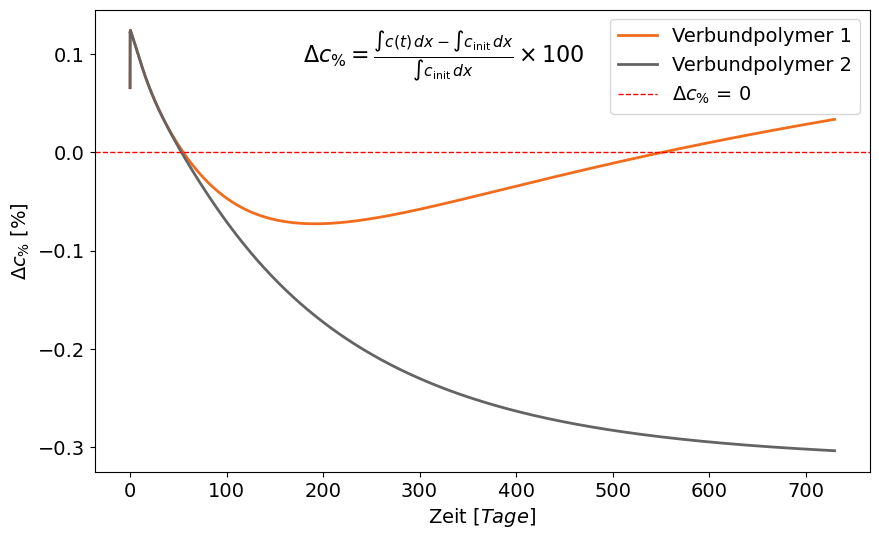

In [27]:
total_masses_init = 200.0
plot_mass_conservation(total_masses_LDPE, total_masses_init, T, len(total_masses_LDPE), plot_interval=1)